First few rows of the dataset:
           State    2013 Urbanization  Year  \
0  New York (36)  Large Central Metro  2018   
1  New York (36)  Large Central Metro  2018   
2  New York (36)  Large Central Metro  2018   
3  New York (36)  Large Central Metro  2018   
4  New York (36)  Large Central Metro  2018   

                                      Cause of death Deaths  Population  \
0  J10.0 (Influenza with pneumonia, influenza vir...     61  10,060,941   
1  J10.1 (Influenza with other respiratory manife...     74  10,060,941   
2  J11.0 (Influenza with pneumonia, virus not ide...     59  10,060,941   
3  J11.1 (Influenza with other respiratory manife...     49  10,060,941   
4            J15.2 (Pneumonia due to staphylococcus)     27  10,060,941   

   Crude Rate Per 100,000  POC  Daily Mean PM2.5 Concentration     Units  \
0                     0.6    1                             8.5  ug/m3 LC   
1                     0.7    1                             2.7  ug/m3 LC   
2      

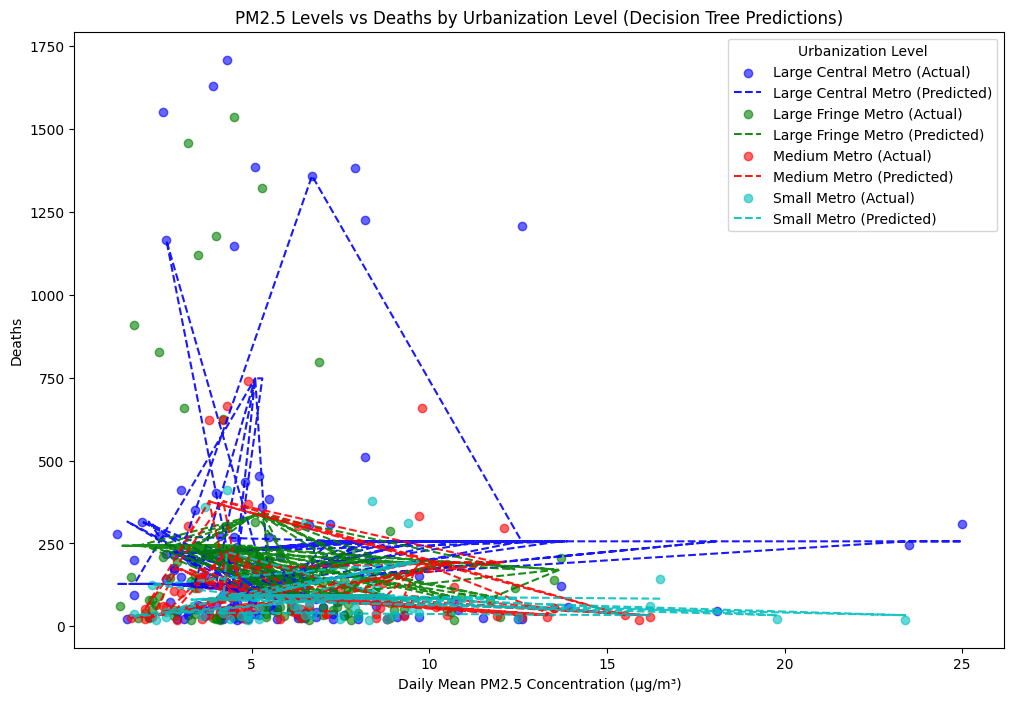

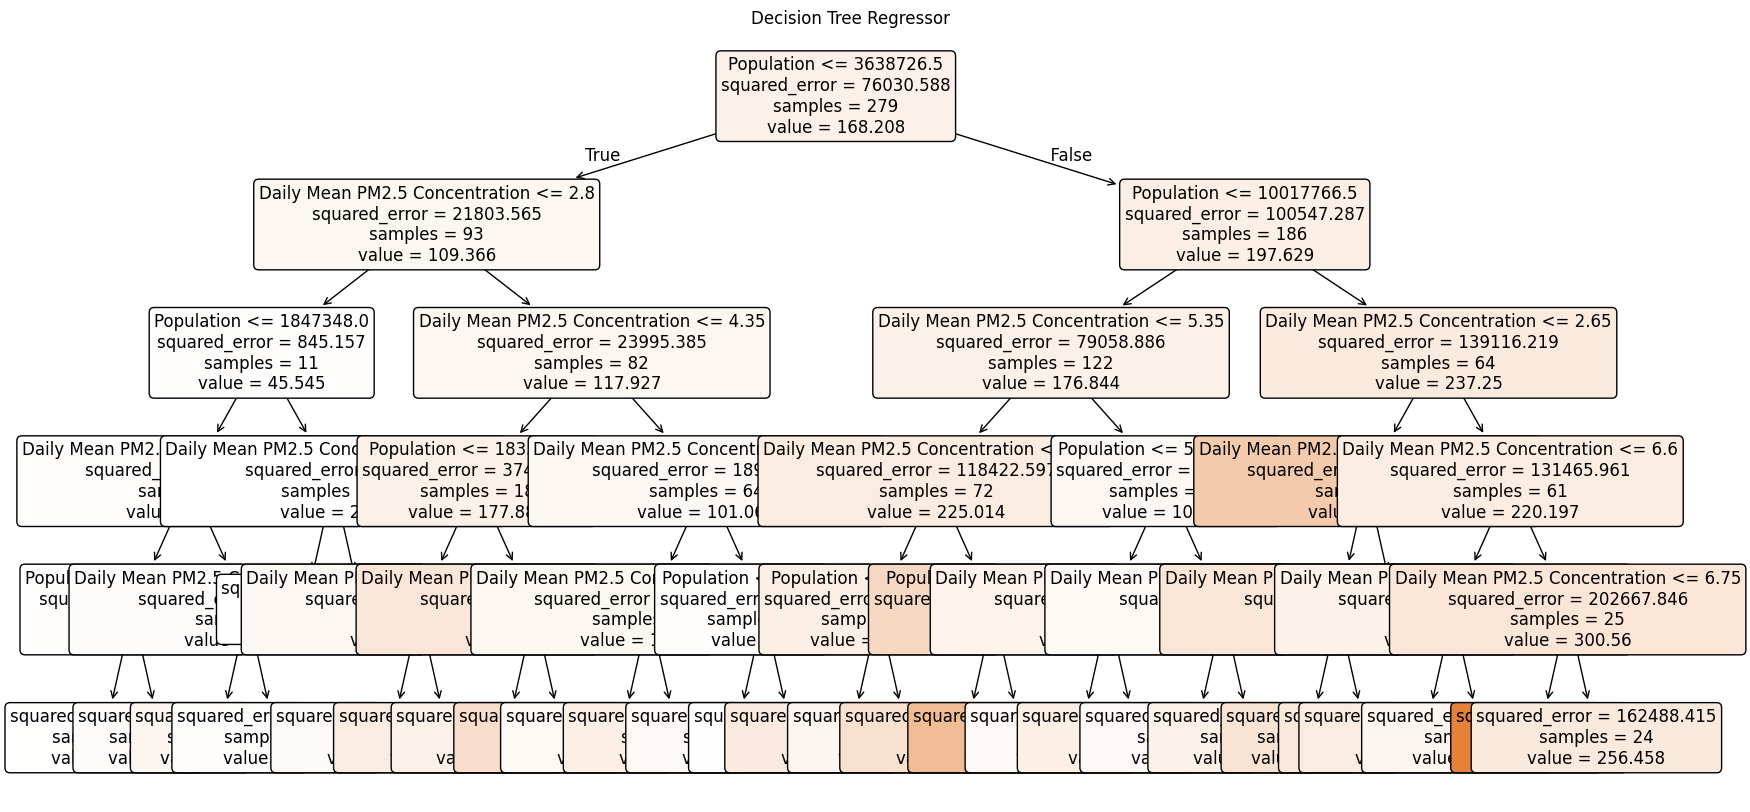

ModuleNotFoundError: No module named 'graphviz'

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load dataset
data = pd.read_csv("merged.csv")

# Clean columns where commas exist (replace commas with empty string)
data['Population'] = data['Population'].replace({',': ''}, regex=True).astype(float)
data['Deaths'] = data['Deaths'].replace({',': ''}, regex=True).astype(float)

# Encode urbanization levels
urbanization_map = {
    "Large Central Metro": 1,
    "Large Fringe Metro": 2,
    "Medium Metro": 3,
    "Small Metro": 4,
    "Micropolitan": 5,
    "Noncore": 6
}
data["Urbanization_Level"] = data["2013 Urbanization"].map(urbanization_map)

# Select relevant features
features = ["Urbanization_Level", "Daily Mean PM2.5 Concentration", "Population"]
target = "Crude Rate Per 100,000"

# Drop rows with missing values
data = data.dropna(subset=features + [target])

# Split into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")

# Select relevant features
features = ["Urbanization_Level", "Daily Mean PM2.5 Concentration", "Population"]
target = "Deaths"  # Replace with the column name for cause of death, if available

# Drop rows with missing values in features or target
data = data.dropna(subset=features + [target])

# Split into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the relationship between PM2.5 and Deaths by Urbanization Level
plt.figure(figsize=(12, 8))

for i, (level, color) in enumerate(zip(urbanization_levels, colors)):
    subset = data[data["2013 Urbanization"] == level]
    
    if subset.empty:
        continue  # Skip if there's no data for this level

    X_subset = subset[["Urbanization_Level", "Daily Mean PM2.5 Concentration", "Population"]]
    y_subset = subset["Deaths"]  # Replace with the cause of death column, if available
    
    # Predictions for the subset
    y_pred = model.predict(X_subset)
    
    # Scatter actual vs predicted
    plt.scatter(
        subset["Daily Mean PM2.5 Concentration"],
        y_subset,
        alpha=0.6,
        label=f"{level} (Actual)",
        color=color,
        marker="o"
    )
    plt.plot(
        subset["Daily Mean PM2.5 Concentration"],
        y_pred,
        alpha=0.9,
        label=f"{level} (Predicted)",
        color=color,
        linestyle="--"
    )

# Finalize plot
plt.xlabel("Daily Mean PM2.5 Concentration (µg/m³)")
plt.ylabel("Deaths")  # Update to reflect the new target
plt.title("PM2.5 Levels vs Deaths by Urbanization Level (Decision Tree Predictions)")
plt.legend(title="Urbanization Level")
plt.show()

from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=features, 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Regressor")
plt.show()

from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=features,
    filled=True,
    rounded=True,
    special_characters=True
)

# Use graphviz to display the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the tree as a file
graph.view()  # Display the tree

model = DecisionTreeRegressor(max_depth=3, random_state=42)
